<>:33: SyntaxWarning: invalid escape sequence '\p'
<>:35: SyntaxWarning: invalid escape sequence '\p'
<>:33: SyntaxWarning: invalid escape sequence '\p'
<>:35: SyntaxWarning: invalid escape sequence '\p'
C:\Users\gfm050\AppData\Local\Temp\ipykernel_6384\560930948.py:33: SyntaxWarning: invalid escape sequence '\p'
  plt.title('Modos Espaciais $\phi_n(x)$')
C:\Users\gfm050\AppData\Local\Temp\ipykernel_6384\560930948.py:35: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('$\phi_n(x)$')


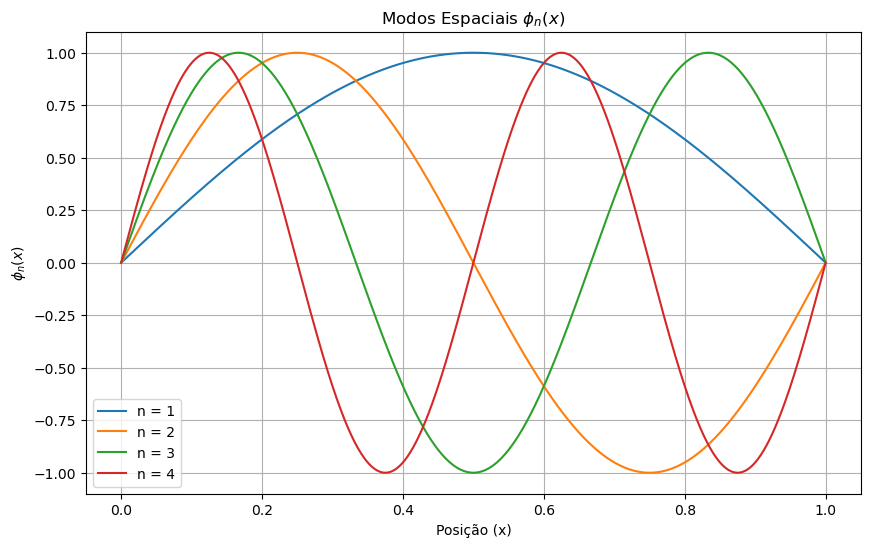

In [2]:
import numpy as np
import matplotlib.pyplot as plt

L = 1.0  # Comprimento da corda
c = 1.0  # Velocidade da onda
n_modes = 4  # Número de modos

# Função para calcular phi_n(x)
def phi_n(x, n, L):
   '''
     Calcula phi(x), modos de vibração da corda

     Args:
       x = posição
       n = número de modos
       L = comprimento da corda

     Returns:
       phi(x)

   '''

   return np.sin(n * np.pi * x / L)

# Gerar pontos espaciais
x = np.linspace(0, L, 1000)

# Plotar os modos
plt.figure(figsize=(10, 6))
for n in range(1, n_modes + 1):
    plt.plot(x, phi_n(x, n, L), label=f'n = {n}')

plt.title('Modos Espaciais $\phi_n(x)$')
plt.xlabel('Posição (x)')
plt.ylabel('$\phi_n(x)$')
plt.legend()
plt.grid(True)
plt.show()

<>:40: SyntaxWarning: invalid escape sequence '\p'
<>:42: SyntaxWarning: invalid escape sequence '\p'
<>:40: SyntaxWarning: invalid escape sequence '\p'
<>:42: SyntaxWarning: invalid escape sequence '\p'
C:\Users\gfm050\AppData\Local\Temp\ipykernel_6384\3416594890.py:40: SyntaxWarning: invalid escape sequence '\p'
  plt.title("Modos Espaciais $\phi_n(x)$ (Diferenças Finitas)")
C:\Users\gfm050\AppData\Local\Temp\ipykernel_6384\3416594890.py:42: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel("$\phi_n(x)$")


Autovalores numéricos (k²): [-157.70175889  -88.75937372  -39.4651678    -9.8687762    -1.
   -1.        ]
Autovalores teóricos (k²): [  9.8696044   39.4784176   88.82643961 157.91367042 246.74011003
 355.30575844]


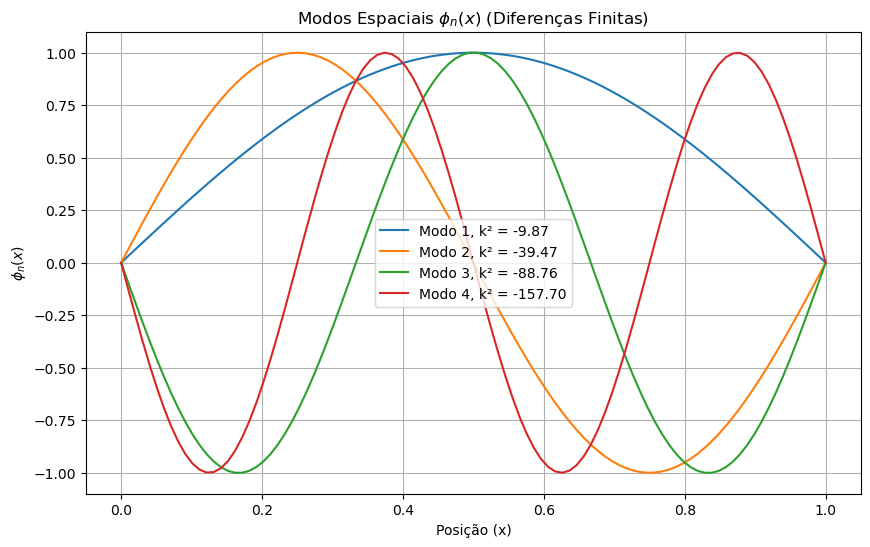

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import eigs

# Parâmetros do problema
L = 1.0          # Comprimento da corda
N = 100          # Número de pontos
dx = L / (N - 1) 

# Construir a matriz tridiagonal do operador d²/dx²
diagonals = [-1 * np.ones(N-1), 2 * np.ones(N), -1 * np.ones(N-1)]
A = diags(diagonals, [-1, 0, 1], shape=(N, N)).toarray() / (dx**2)

# Condições de contorno (phi[0] = phi[-1] = 0)
A[0, :] = 0
A[0, 0] = 1
A[-1, :] = 0
A[-1, -1] = 1

# Resolver autovalores (k² = -λ)
eigenvalues, eigenvectors = eigs(A, k=6, which='SM')  # 5 menores autovalores em módulo
k_squared = -eigenvalues.real  # k² = -λ

# Verificar os autovalores teóricos (k_n = nπ/L)
n_values = np.arange(1, 7)
k_theoretical = (n_values * np.pi / L)**2

print("Autovalores numéricos (k²):", np.sort(k_squared))
print("Autovalores teóricos (k²):", k_theoretical)

# Plotar os autovetores (modos espaciais)
x = np.linspace(0, L, N)
plt.figure(figsize=(10, 6))
for i in range(4):  # Plotar os 4 primeiros modos
    mode = eigenvectors[:, i].real
    mode = mode / np.max(np.abs(mode))  # Normalizar
    plt.plot(x, mode, label=f'Modo {i+1}, k² = {k_squared[i]:.2f}')

plt.title("Modos Espaciais $\phi_n(x)$ (Diferenças Finitas)")
plt.xlabel("Posição (x)")
plt.ylabel("$\phi_n(x)$")
plt.legend()
plt.grid(True)
plt.show()

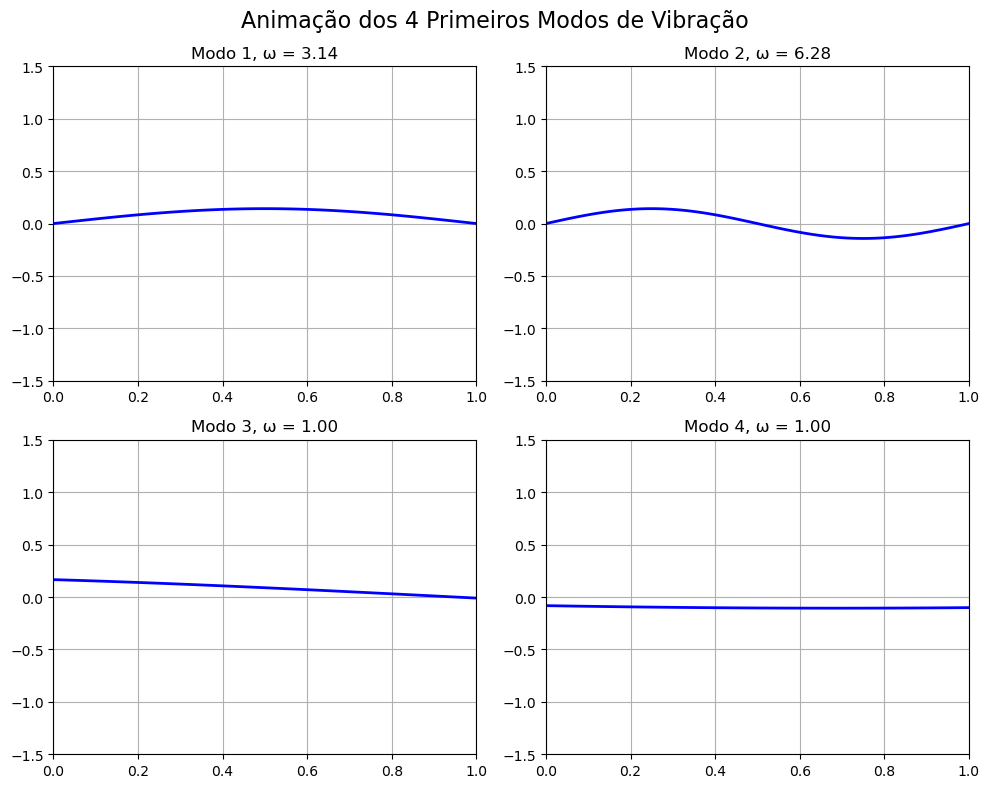

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.sparse import diags
from scipy.sparse.linalg import eigs

# Parâmetros do problema
L = 1.0           # Comprimento da corda
N = 100           # Número de pontos 
dx = L / (N - 1)  # Espaçamento da grade
c = 1.0           # Velocidade da onda 

# matriz tridiagonal do operador d²/dx²
diagonals = [-1 * np.ones(N-1), 2 * np.ones(N), -1 * np.ones(N-1)]
A = diags(diagonals, [-1, 0, 1], shape=(N, N)).toarray() / (dx**2)

# Condições de contorno (phi[0] = phi[-1] = 0)
A[0, :] = 0
A[0, 0] = 1
A[-1, :] = 0
A[-1, -1] = 1

# Resolver o problema de autovalores (k² = -λ)
eigenvalues, eigenvectors = eigs(A, k=4, which='SM')  
k_values = np.sqrt(eigenvalues.real)                
omega_values = c * k_values                            


x = np.linspace(0, L, N)

# Figura e subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Animação dos 4 Primeiros Modos de Vibração', fontsize=16)
axes = axes.flatten()

# Inicializar linhas para cada modo
lines = []
for i, ax in enumerate(axes):
    line, = ax.plot(x, eigenvectors[:, i].real, 'b-', linewidth=2)
    ax.set_title(f'Modo {i+1}, ω = {omega_values[i]:.2f}')
    ax.set_xlim(0, L)
    ax.set_ylim(-1.5, 1.5)
    ax.grid(True)
    lines.append(line)

# Função de animação
def update(t):
    for i, line in enumerate(lines):
        # Solução temporal: ϕ(x) * cos(ωt)
        y = eigenvectors[:, i].real * np.cos(omega_values[i] * t)
        line.set_ydata(y)
    return lines

# Criar a animação
ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 100),
                    interval=50, blit=True)

plt.tight_layout()
plt.show()

# Salvar a animação (opcional)
# ani.save('modos_vibracao.mp4', writer='ffmpeg', fps=30)